In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
#read the file
source_df = pd.read_csv(
    '2022-03-14-Topeka-Levee-Survey-Fall-2020 - 2022-03-14-Topeka-Levee-Survey-Fall-2020.csv')

In [31]:
#get rid of columns we don't need ( these were all the same or blank)
del source_df['Contact Form']
del source_df['email_marketing_consent']
del source_df['feedback_ip']

In [32]:
#these columns have the same question  /  answer, combine them into one and remove the original
source_df['23_Please select your greatest barrier to using the levee trails:'] = source_df[['23_Please select your greatest barrier to using the levee trails:',
                                                                                            '16_Please select your greatest barrier to using the levee trails:'
                                                                                            ]].fillna('').agg(lambda x: ''.join(x.values), axis=1).T
del source_df['16_Please select your greatest barrier to using the levee trails:']

source_df["14_Did you know that it's legal for the public to bike and walk the levees along the Kansas River within Topeka city limits?"] = source_df[[ "14_Did you know that it's legal for the public to bike and walk the levees along the Kansas River within Topeka city limits?",
                                                                                                                                                        "14_Did you know that it's legal for the public to bike and walk the levees along the Kansas River?", "10_Did you know that it's legal for the public to bike and walk the levees along the Kansas River?"]].fillna('').agg(lambda x: ''.join(x.values), axis=1).T
del source_df["14_Did you know that it's legal for the public to bike and walk the levees along the Kansas River?"]
del source_df["10_Did you know that it's legal for the public to bike and walk the levees along the Kansas River?"]

source_df['15_What recreation activities would you like to do along the Kansas River in Topeka?'] = source_df[[
    '15_What recreation activities would you like to do along the Kansas River in Shawnee County?',
    '15_What section(s) of the levee trail are you most likely to use?',
    '15_What recreation activities would you like to do along the Kansas River in Topeka?']].fillna('').agg(lambda x: ''.join(x.values), axis=1).T
del source_df['15_What recreation activities would you like to do along the Kansas River in Shawnee County?']
del source_df['15_What section(s) of the levee trail are you most likely to use?']

In [33]:
#Takes a column and if it has multiple values seperated by a comma, builds a list of unique values and then does a frequency count of those values across the column, returns the value frequency count
def parse_multi_choice(column_name):
    q_answers = {} #dict for holding the distinct values
    source_df[column_name] = source_df[column_name].fillna('')
    for r in source_df[column_name].str.split(', '):  #loop through all rows and find the distincts
        for i in r:
            if i != '':
                if i not in q_answers:
                    q_answers[i.strip()] = 0
    for i, r in source_df[[column_name]].iterrows(): #loop through all rows and do a frequency count against the dict created earlier
        if r[0]:
            for v in r[0].split(','):
                if v in q_answers:
                    q_answers[v.strip()] = q_answers[v.strip()] + 1
    return q_answers


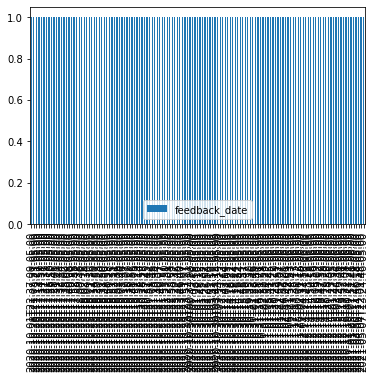

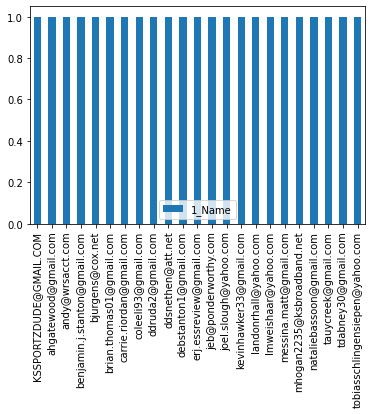

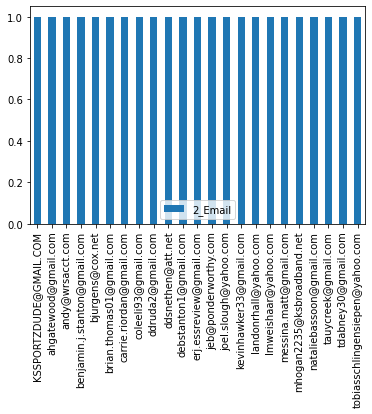

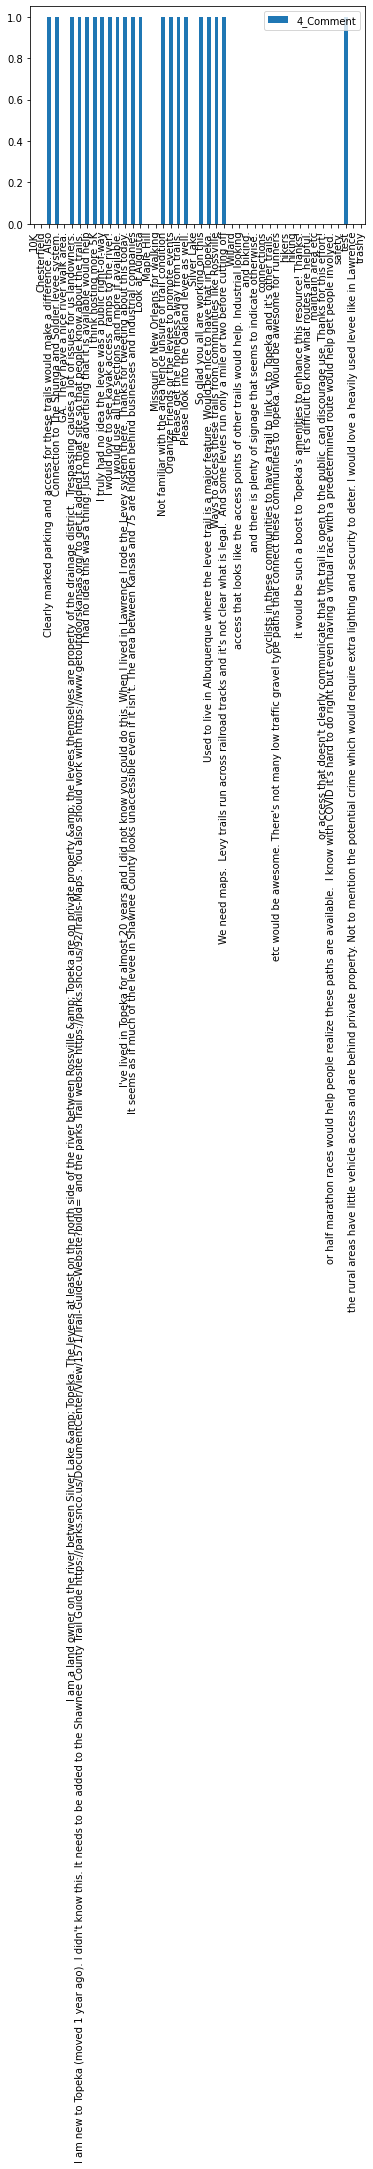

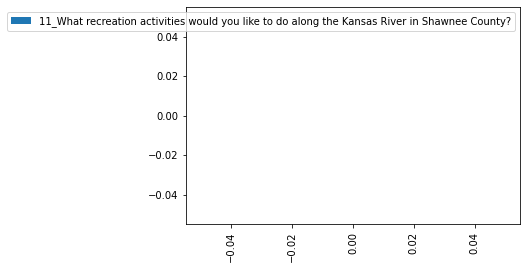

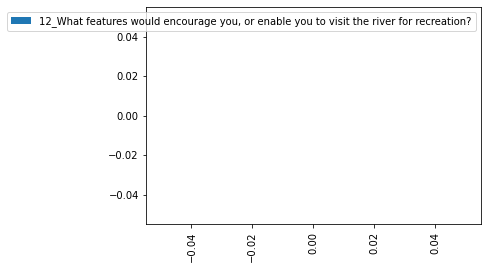

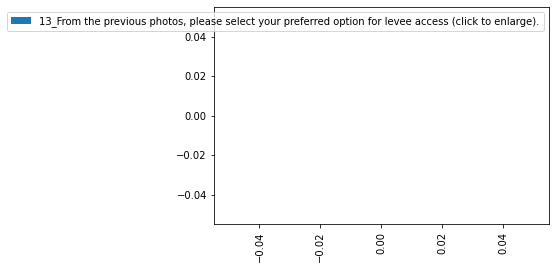

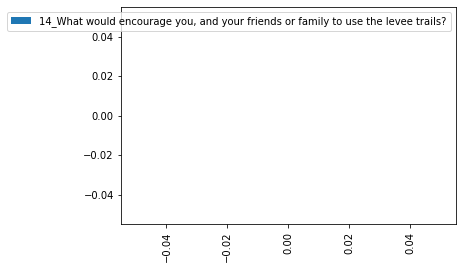

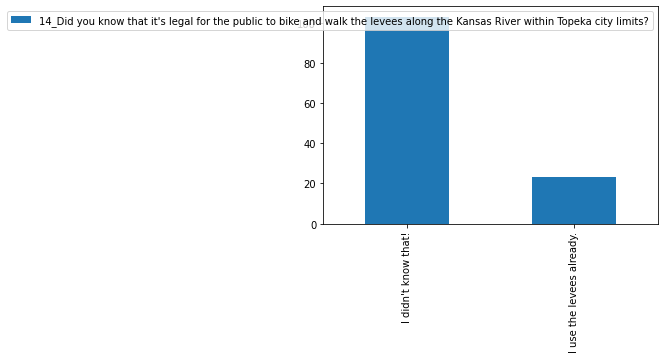

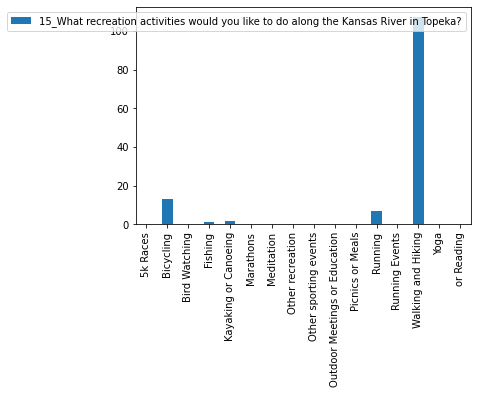

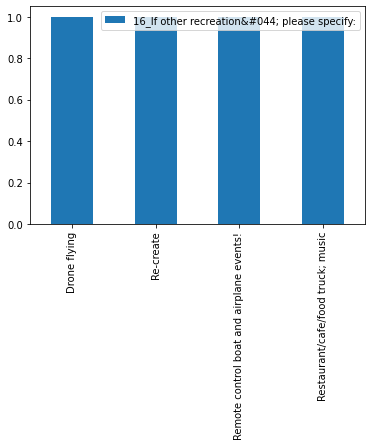

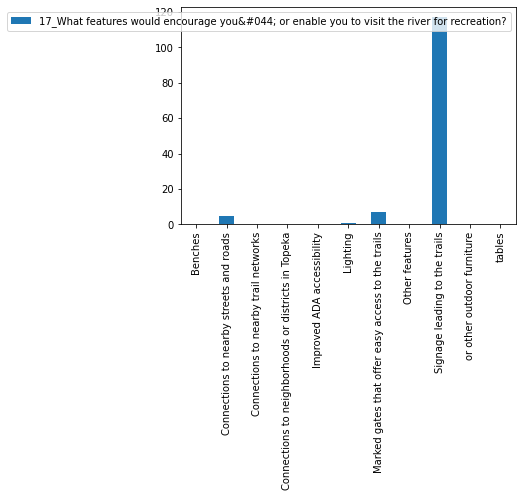

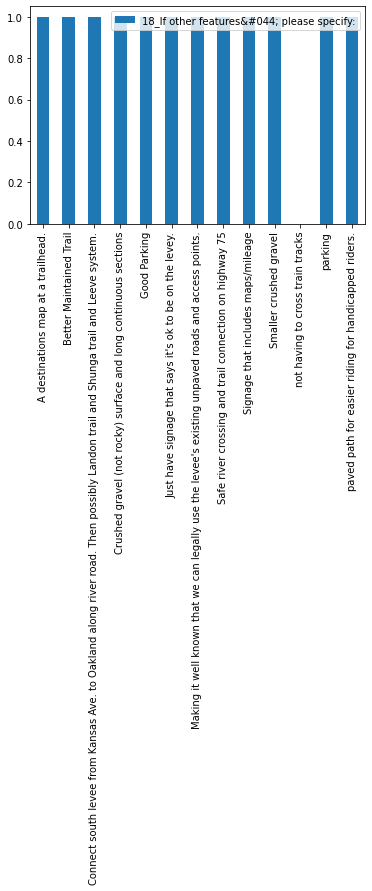

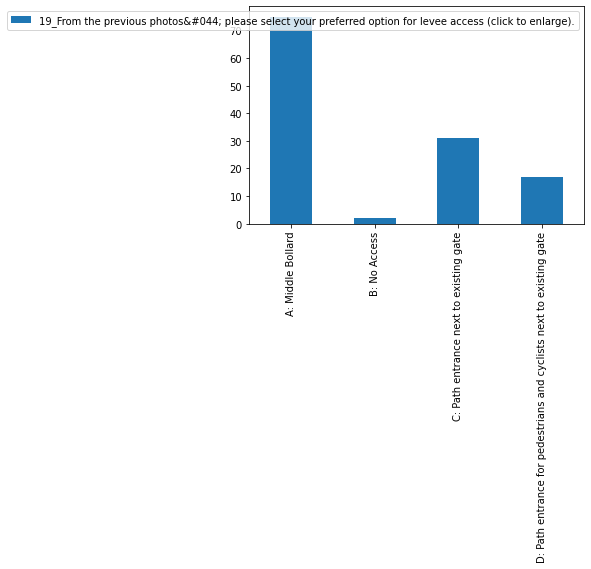

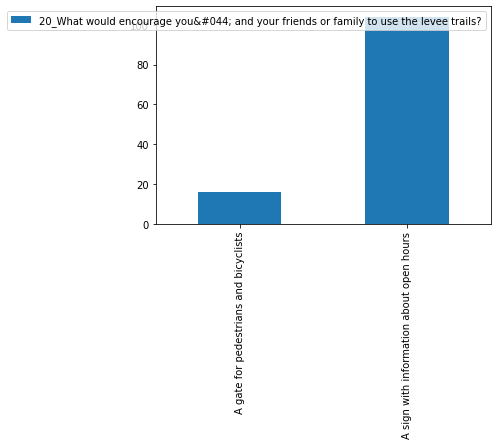

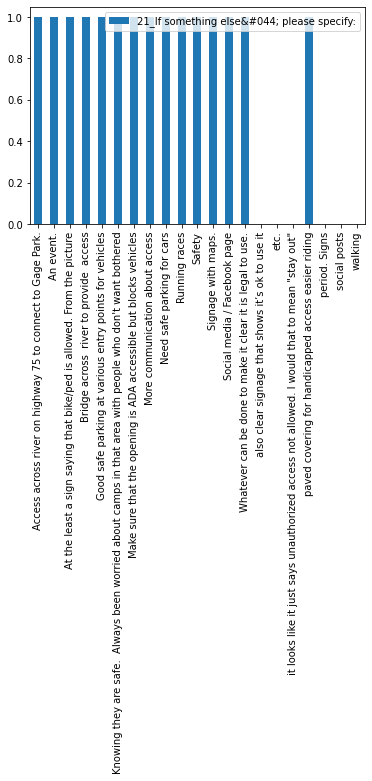

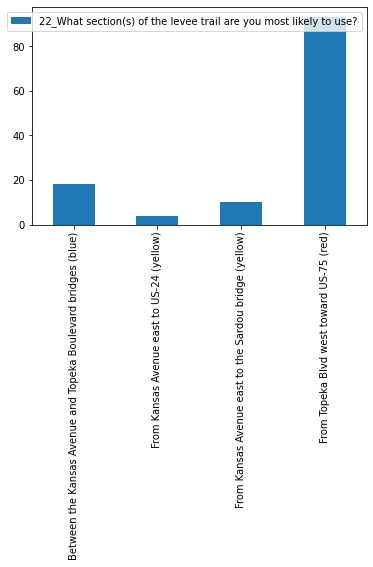

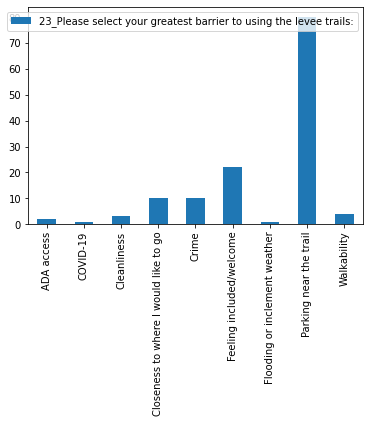

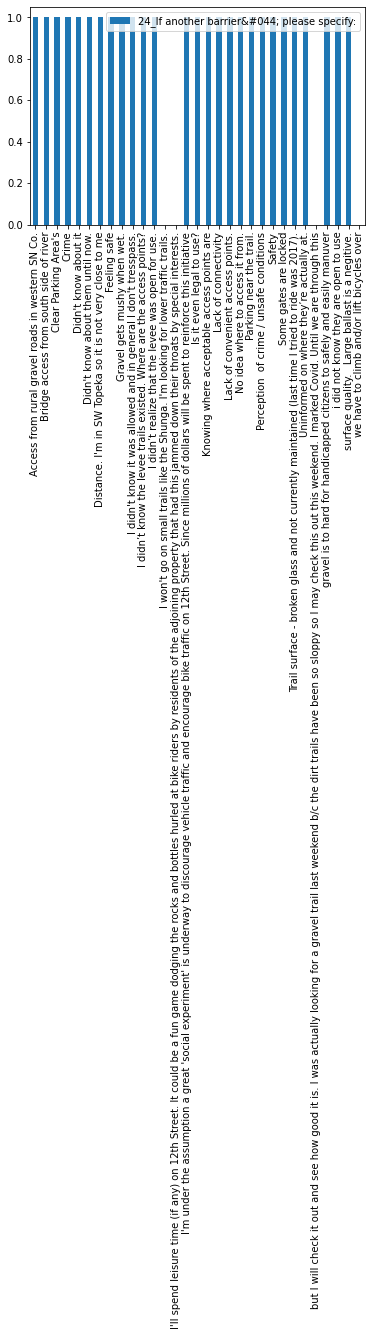

In [34]:
#try to graph every column, try and export each as a csv as well, brute force
for i in source_df.columns:
    try:
        d = pd.DataFrame({i: parse_multi_choice((i))})
        d.plot(kind='bar')
        try: 
            plt.savefig('./output/' +i +'.png')
        except:
            pass

        try:
            d.to_csv('./output/' + i + '.csv')
        except:
           pass
        
    except :
        pass
